# Exploratory Data Analysis (EDA) - Olympics Dataset

## Understanding and Gathering Information Regarding the Dataset

In [1]:
import pandas as pd
import numpy as np

#### Shape of Olympics Dataset

In [2]:
olympics = pd.read_csv("Olympic.csv")

#Print the shape of Olympics Dataset
print(olympics.shape)

olympics.head()

(271116, 17)


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


#### Understanding the Data_Types within the Dataset.

In [3]:
olympics = pd.read_csv("Olympic.csv")

# Identify the numerical (dtypes-int/float) datatyoes for further mathematical operations
newdf = olympics.select_dtypes(include = np.number)
numbercoulmns = newdf.columns

print(list(numbercoulmns))

['ID', 'Age', 'Height', 'Weight', 'Year']


In [4]:
olympics = olympics['Age'].describe()
print(olympics)

count    261642.000000
mean         25.556898
std           6.393561
min          10.000000
25%          21.000000
50%          24.000000
75%          28.000000
max          97.000000
Name: Age, dtype: float64


####  Identifying the null / NA values in the Dataset.

In [7]:
olympics = pd.read_csv("Olympic.csv")
for x in olympics.columns:
    if olympics[x].isnull().values.ravel().sum() > 0:
        print('{} - {}'.format(x, olympics[x].isnull().values.ravel().sum()))

Age - 9474
Height - 60171
Weight - 62875
Medal - 231333
region - 370
notes - 266077


#### Handling and replacing Null/NA Values

In [9]:
de = olympics.isnull().sum()
print(de)

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
region       370
notes     266077
dtype: int64


#### Identifying and Removing Unnecessary columns and Replacing data on the subsets of Olympics Dataset.

In [10]:
# Drop/Remove the unnecessary columns from the Olympics Dataset

olympics = olympics.drop(['Height' , 'Weight' , 'notes'],axis=1)
olympics = olympics.dropna(subset = ['region'])

print(olympics.shape)

(270746, 14)


DNW       230972
Gold       13371
Bronze     13291
Silver     13112
Name: Medal, dtype: int64


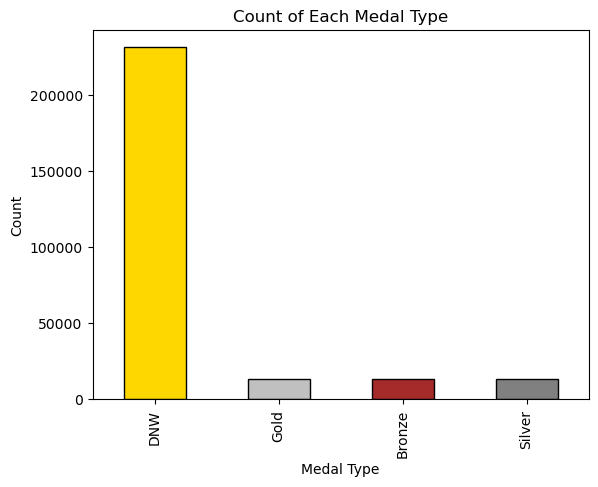

In [17]:
import matplotlib.pyplot as plt
# Replce the nul/NA value in the Medal column with DNW - (Did not Win)
olympics = olympics[pd.notnull(olympics['region'])]

olympics['Medal'].fillna('DNW', inplace=True)
medal_counts = olympics['Medal'].value_counts()
print(medal_counts)

medal_counts.plot(kind='bar', color=['gold', 'silver', 'brown', 'gray'], edgecolor='black')
plt.title('Count of Each Medal Type')
plt.xlabel('Medal Type')
plt.ylabel('Count')
plt.show()

## Statistical Analysis

#### Now we have a concrete understanding of the dataset. We now know what our dataset looks like. Now we will move toward the statistical analysis of this dataset.

#### Handling the Null/NA values on a numerical data. 

In [18]:
mean_age_by_sport = olympics.groupby('Sport')['Age'].mean()
def fill_age_nan(row):
    if pd.isna(row['Age']):
        return mean_age_by_sport[row['Sport']]
    else:
        return row['Age']

olympics['Age'] = olympics.apply(fill_age_nan, axis=1)
olympics.to_csv('olympics_filled_age.csv', index=False)

df_updated = pd.read_csv('olympics_filled_age.csv')
mean_age = df_updated['Age'].mean()
print("Average Mean Age:", round(mean_age))

Average Mean Age: 26


#### Probability Distribution of “Age” for all the players who participated in the Football between the years 2000 - 2018.

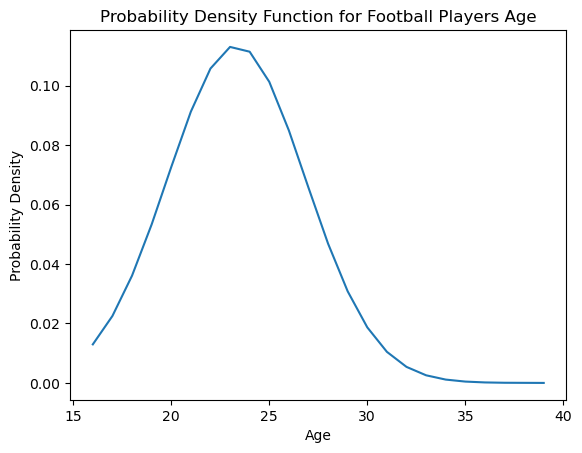

The maximum probability distribution in the range of 5 is at age 23.0 with a probability of 0.112996


In [30]:
from scipy.stats import norm

olympics = pd.read_csv('olympics_filled_age.csv')

df = olympics.copy()

F_Age = df.loc[(df['Sport'] == 'Football') & (df['Year'] >= 2000) & (df['Year']<=2018)]['Age']

F_Age = sorted(F_Age)

meanf_age = np.mean(F_Age)
stdevf_age = np.std(F_Age)

prodf = norm.pdf(F_Age, loc=meanf_age, scale=stdevf_age)

plt.plot(F_Age, prodf)
plt.xlabel('Age')
plt.ylabel('Probability Density')
plt.title('Probability Density Function for Football Players Age')
plt.show()


max_prob_age = F_Age[np.argmax(prodf)]
max_prob = np.max(prodf)
print(f"The maximum probability distribution in the range of 5 is at age {max_prob_age} with a probability of {round(max_prob,6)}")

#### Determining Skewness for the overall distribution of Gold Medals tally of India.

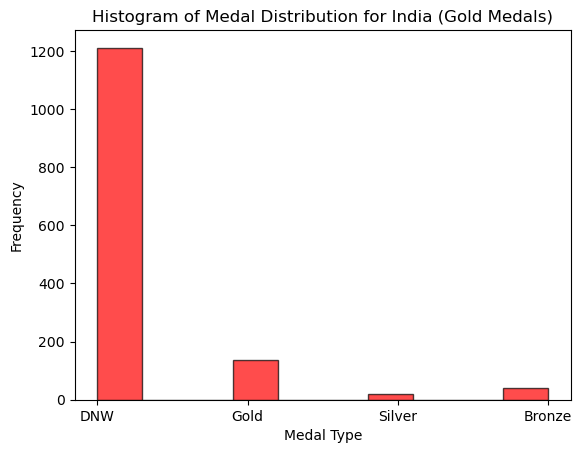

In [49]:
Skew_pre = df.loc[(df['region'] == 'India')]['Medal'].dropna()

plt.hist(Skew_pre, bins=10, color='red', edgecolor='black', alpha=0.7)
plt.title('Histogram of Medal Distribution for India (Gold Medals)')
plt.xlabel('Medal Type')
plt.ylabel('Frequency')
plt.show()

In [52]:
import scipy.stats as stats

Skew_pre = df.loc[(df['region'] == 'India') & (df['Medal'] == 'Gold')]
nSkew_pre = Skew_pre.groupby('Year')['Medal'].value_counts()

skewness_medal = stats.skew(nSkew_pre)

if skewness_medal > 0:
    skew_type = "Positive skewness / Right Skewed"
elif skewness_medal < 0:
    skew_type = "Negative skewness / Left Skewed"
else:
    skew_type = "Zero skewness"

print("Skewness:", round(skewness_medal,5))
print("Skewness Type:", skew_type)

Skewness: -1.24822
Skewness Type: Negative skewness / Left Skewed


#### Standard Deviation of The Distribution of Gold Medals When The UK is Hosting and When UK is Not Hosting.

In [55]:
import statistics

london_medals_host = olympics.loc[(olympics["City"] == "London") & (olympics["region"] == "UK") & (olympics["Medal"] == "Gold")] 
gold_count_host = london_medals_host.groupby("Year")["Medal"].value_counts() 

london_medals_non_host = olympics.loc[(olympics["City"] != "London") & (olympics["region"] == "UK") & (olympics["Medal"] == "Gold")] 
gold_count_non_host = london_medals_non_host.groupby("Year")["Medal"].value_counts() 

host_stdev = statistics.stdev(gold_count_host) 
non_host_stdev = statistics.stdev(gold_count_non_host) 

print("STDEV - UK Hosting :",round(host_stdev,5)) 
print("STDEV - UK not Hosting :",round(non_host_stdev,5))

STDEV - UK Hosting : 71.97453
STDEV - UK not Hosting : 18.14528


#### Standardize the Dataset (Age column) and Calculate Standardize Mean and Standardize Standard Deviation.

In [58]:
shooting_data = df[olympics['Sport'] == 'Shooting']

# Calculate the mean and standard deviation of the age column in the Shooting Competition
age_mean = shooting_data['Age'].mean()
age_std = shooting_data['Age'].std()

# Standardize the age data
shooting_data['Standardized_Age'] = (shooting_data['Age'] - age_mean) / age_std

# Calculate the mean and standard deviation of the standardized age data
standardized_age_mean = shooting_data['Standardized_Age'].mean()
standardized_age_std = shooting_data['Standardized_Age'].std()

print("standardized Age_mean :",round(standardized_age_mean))
print("standardized Age_Stdev :",round(standardized_age_std))

standardized Age_mean : 0
standardized Age_Stdev : 1


C:\Users\singh\AppData\Local\Temp\ipykernel_8744\2758811834.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shooting_data['Standardized_Age'] = (shooting_data['Age'] - age_mean) / age_std


#### Correlation Analysis (Between Age Column and Medal Column). 

In [70]:
import statistics

olympics = pd.read_csv('olympics_filled_age.csv')

df  = olympics.copy()
medal_mapping = {'Gold': 3, 'Silver': 2, 'Bronze': 1, 'None': 0}
df['Medal'] = df['Medal'].map(medal_mapping)

# Calculate the correlation between "Medal" and "Age"
correlation = df['Medal'].corr(df['Age'])

if (correlation > 0):
    print("Positive Correlation", f"and Correlation coefficient: {round(correlation,6)}")
elif(correlation < 0):
    print("Negative Correlation", f"and Correlation coefficient: {round(correlation,6)}")
else:
    print("no Coorelation were established")

Positive Correlation and Correlation coefficient: 0.002168


#### IQR for the Age Column.

In [72]:
age_column = df['Age']

q1 = age_column.quantile(0.25)

q3 = age_column.quantile(0.75)

iqr = q3 - q1

print("IQR for the Age Column:", iqr)

IQR for the Age Column: 6.0


## Dataset Visualisation

#### Now we move towards the visual representation of our Olympics dataset to know more key insights from the data.

#### Frequency of Cities Hosted Olympics

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

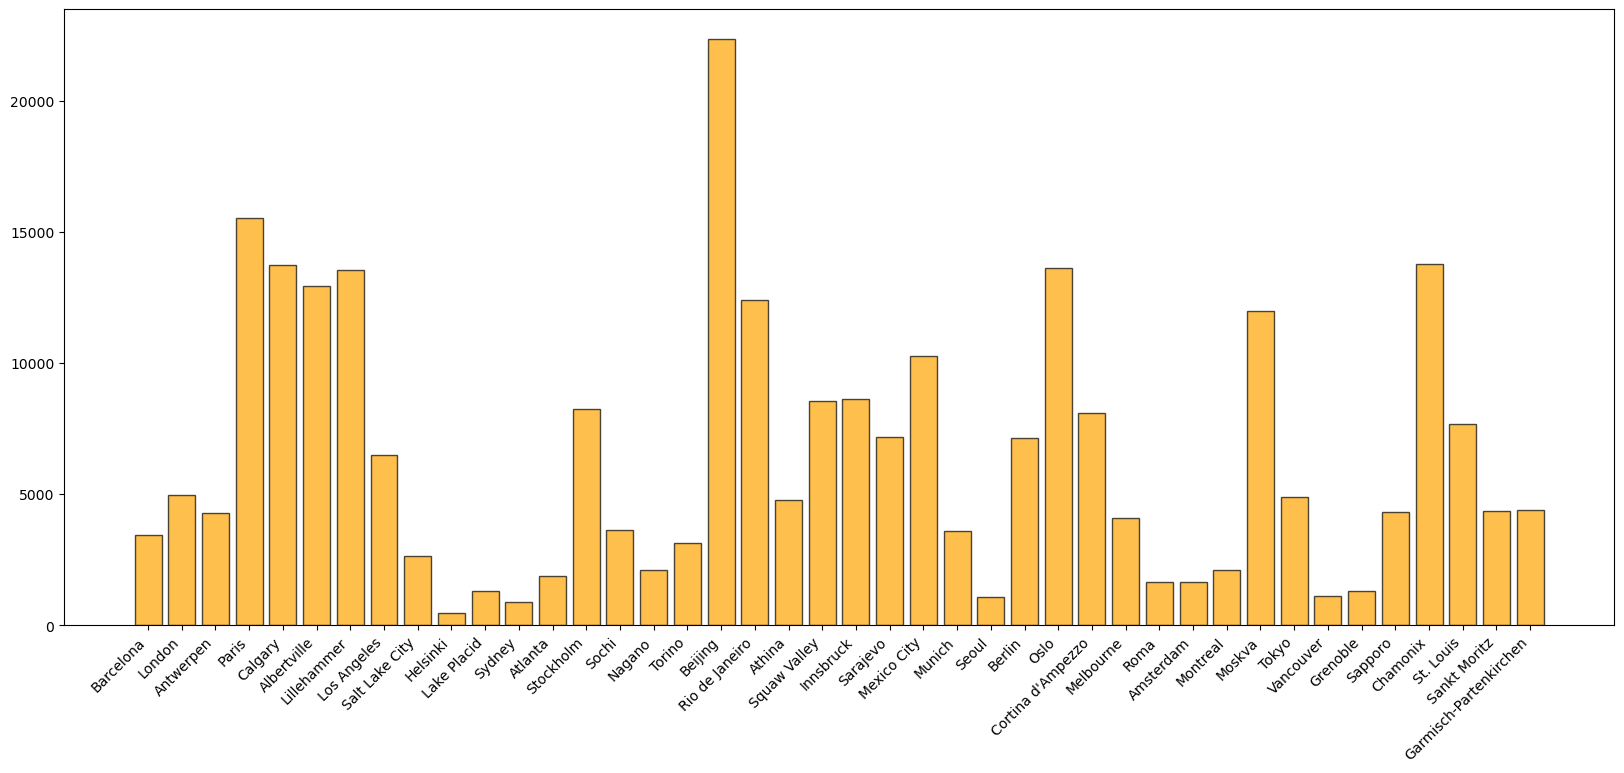

Frequency of the Cities Hosted Olympics: 42


In [94]:
olympics = pd.read_csv('olympics_filled_age.csv')

df = olympics.copy()

n = len(pd.unique(df['City']))
val = df.groupby('City')['City'].value_counts().values

y=np.array(val)
a=pd.unique(df['City'])

x=np.array(a)
plt.figure(figsize=(20,8))
plt.bar(x,y,color='orange',edgecolor='black', alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.show()
print("Frequency of the Cities Hosted Olympics:",n)

#### Top 5 Performing Sports based on the No of Medals (Bar Graph)

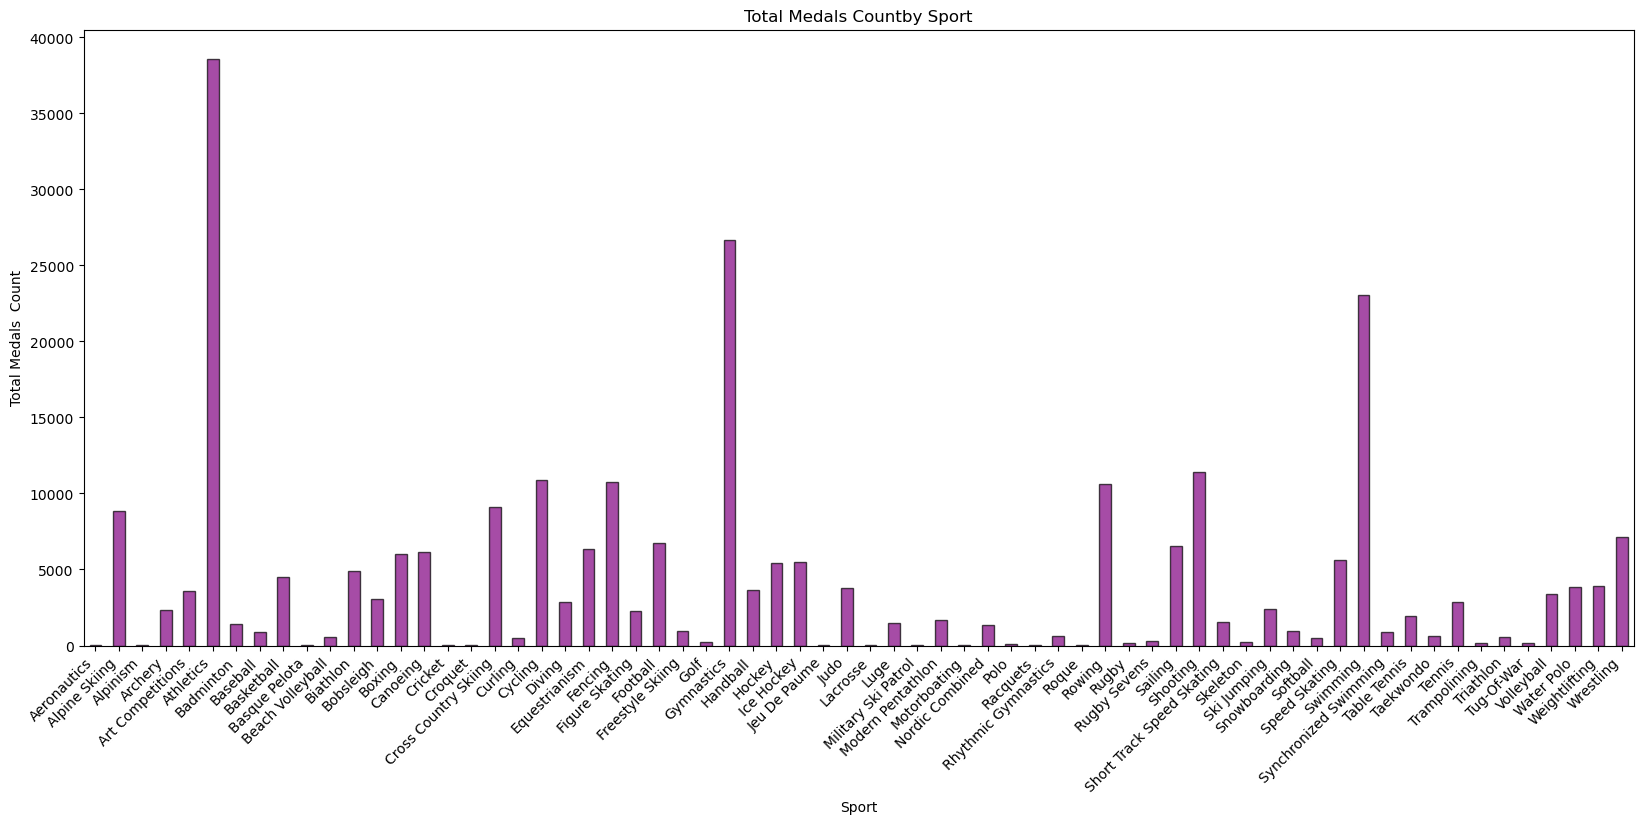

Top 5 Sports based on the most number of Medals:
1. Athletics - 38585 Medals
2. Gymnastics - 26703 Medals
3. Swimming - 23048 Medals
4. Shooting - 11432 Medals
5. Cycling - 10859 Medals


In [95]:
# Filter rows with any medal
filtered_df = df[df['Medal'].notnull()]

# Group by Sport and count total medals
grouped_df = filtered_df.groupby('Sport')['Medal'].count()


plt.figure(figsize=(20, 8))
grouped_df.plot(kind='bar', color='purple', edgecolor='black', alpha=0.7)
plt.title('Total Medals Countby Sport')
plt.xlabel('Sport')
plt.ylabel('Total Medals  Count')
plt.xticks(rotation=45, ha='right')  
plt.show()

top5_sports = grouped_df.nlargest(5)

print("Top 5 Sports based on the most number of Medals:")
for i, (sport, count) in enumerate(top5_sports.items(), start=1):
    print(f"{i}. {sport} - {count} Medals")

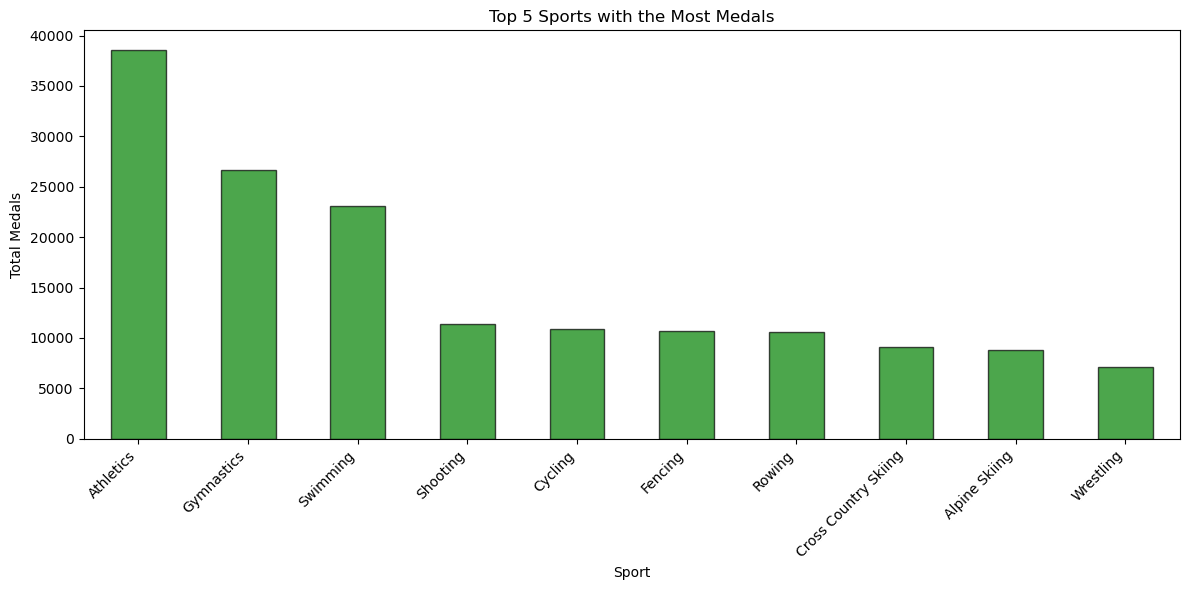

Leading Sport based on the most number of Medals: Athletics - 38585 Medals


In [99]:
top5_sports = grouped_df.nlargest(10)

plt.figure(figsize=(12, 6))
top5_sports.plot(kind='bar', color='green', edgecolor='black', alpha=0.7)
plt.title('Top 5 Sports with the Most Medals')
plt.xlabel('Sport')
plt.ylabel('Total Medals')
plt.xticks(rotation=45, ha='right')
plt.tight_layout() 
plt.show()
leading_sport, leading_count = top5_sports.head(1).index[0], top5_sports.head(1).values[0]
print(f"Leading Sport based on the most number of Medals: { leading_sport} - {leading_count} Medals")


#### Most No of Gold Medal

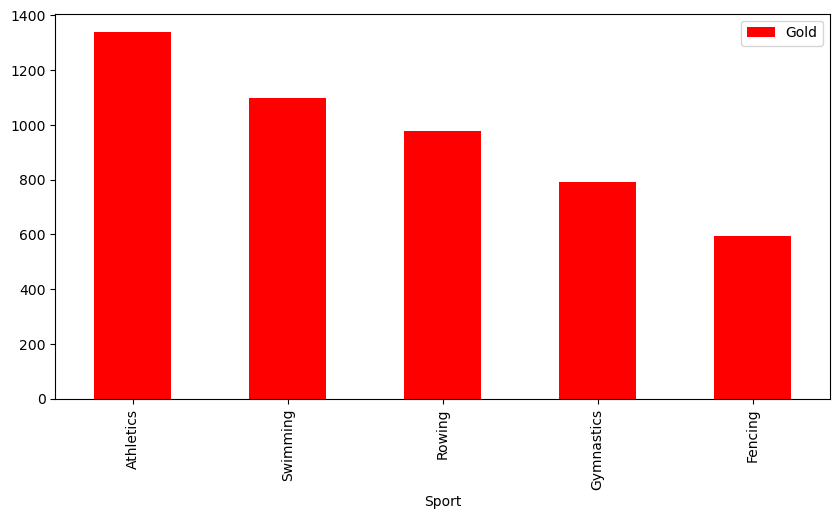

The sport with the most number of gold medals is: Athletics


In [102]:
gold = olympics[(olympics['Medal'] == 'Gold')]
data=[]
for sport in gold['Sport'].unique():
    data.append([sport,len(gold[gold['Sport']==sport])])
data=pd.DataFrame(data,columns=['Sport','Gold']).sort_values(by='Gold',ascending=False).head()
data.plot(x='Sport',y='Gold',kind='bar',color = 'red',figsize=(10,5))
plt.show()

most_gold_sport = data.iloc[0]['Sport']
print(f"The sport with the most number of gold medals is: {most_gold_sport}")


#### First Gold Medal for India 

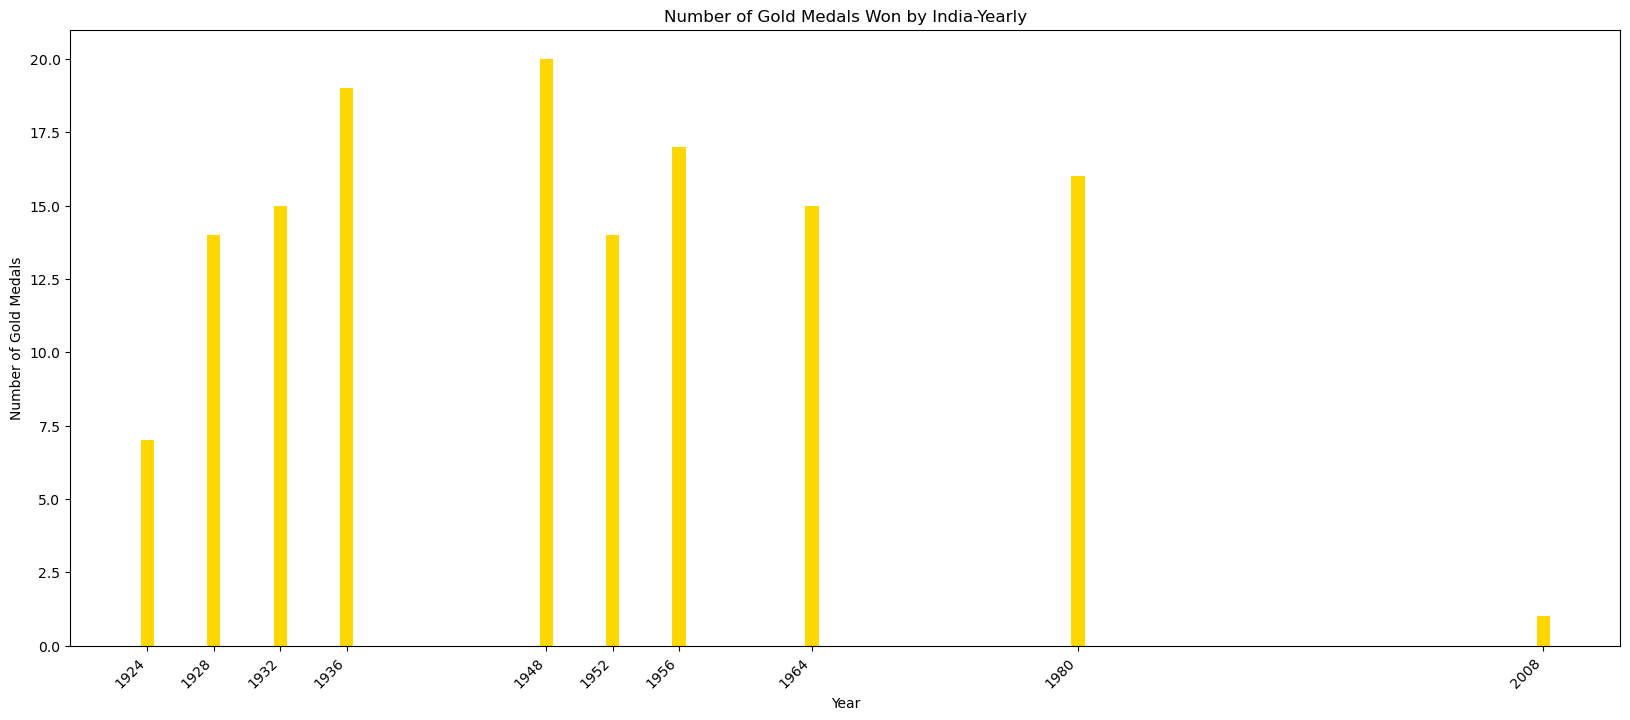

India Won its First Gold Medal In Olympics of: 1924


In [109]:
filtered_df = df[(df['Medal'] == 'Gold') & (df['Team'] == 'India')]
grouped_df = filtered_df.groupby('Year').size()

years = grouped_df.index
counts = grouped_df.values

plt.figure(figsize=(20, 8))
plt.bar(years, counts, color='gold')
plt.title('Number of Gold Medals Won by India-Yearly')
plt.xlabel('Year')
plt.ylabel('Number of Gold Medals')
plt.xticks(years, rotation=45, ha='right')  # Set x-axis ticks to every year
plt.show()

first_gold_year = years.min()
print("India Won its First Gold Medal In Olympics of:",first_gold_year)


In [108]:
first_gold_details = df[(df['Medal'] == 'Gold') & (df['Team'] == 'India') & (df['Year'] == first_gold_year)]
print("\nDetails about India's First Gold Medal:")
print(first_gold_details)


Details about India's First Gold Medal:
            ID            Name Sex      Age   Team  NOC        Games  Year  \
217997  109611  Antarge Sherpa   M  38.8125  India  IND  1924 Winter  1924   
218001  109613   Lhakpa Sherpa   M  38.8125  India  IND  1924 Winter  1924   
218002  109614    Narbu Sherpa   M  38.8125  India  IND  1924 Winter  1924   
218003  109615   Pasang Sherpa   M  38.8125  India  IND  1924 Winter  1924   
218004  109616   Pembra Sherpa   M  38.8125  India  IND  1924 Winter  1924   
218005  109617    Sange Sherpa   M  38.8125  India  IND  1924 Winter  1924   
218006  109618    Temba Sherpa   M  38.8125  India  IND  1924 Winter  1924   

        Season      City     Sport                    Event Medal region  
217997  Winter  Chamonix  Alpinism  Alpinism Mixed Alpinism  Gold  India  
218001  Winter  Chamonix  Alpinism  Alpinism Mixed Alpinism  Gold  India  
218002  Winter  Chamonix  Alpinism  Alpinism Mixed Alpinism  Gold  India  
218003  Winter  Chamonix  Alpinism

#### Most Popular Event - Based on the no of Participants

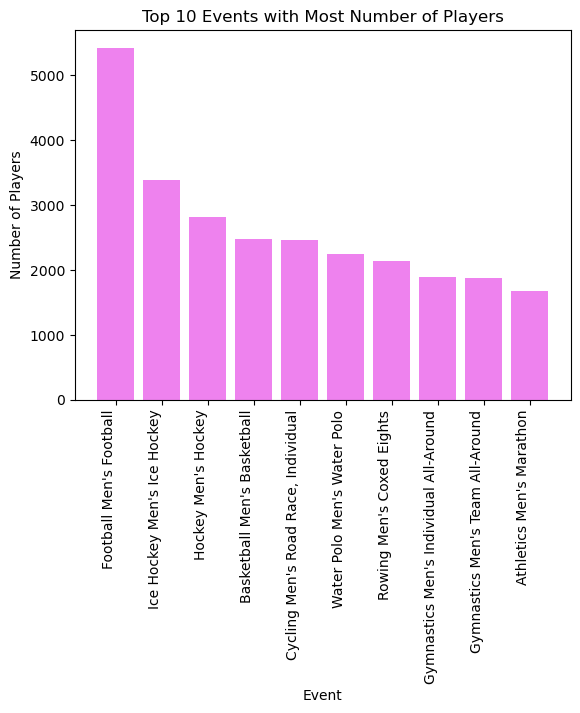

The sport with the Polpular based on no of participants is: Football Men's Football


In [118]:
event_count = df.groupby('Event')['ID'].nunique().sort_values(ascending=False)[:10]
plt.bar(event_count.index, event_count.values,color='violet')
plt.title('Top 10 Events with Most Number of Players')
plt.xlabel('Event')
plt.ylabel('Number of Players')
plt.xticks(rotation=90, ha='right')
plt.show()

most_pop_sport = event_count.index[0]
print(f"The sport with the Polpular based on no of participants is: {most_pop_sport}")

#### Sports with Most  Female Gold Medalists

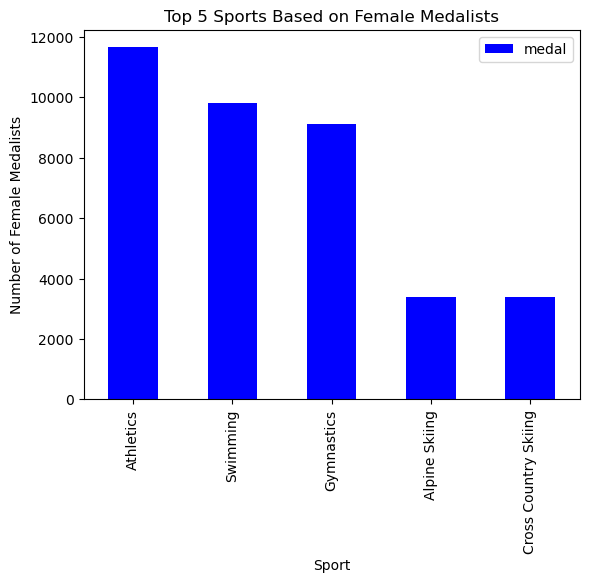

                  Sport  medal
0             Athletics  11651
1              Swimming   9798
2            Gymnastics   9125
3         Alpine Skiing   3398
4  Cross Country Skiing   3385


In [123]:
sport_counts = medal['Sport'].value_counts().head()
data = pd.DataFrame({'Sport': sport_counts.index, 'medal': sport_counts.values})

data.plot(x='Sport', y='medal', kind='bar', color='blue')
plt.title('Top 5 Sports Based on Female Medalists')
plt.xlabel('Sport')
plt.ylabel('Number of Female Medalists')
plt.show()
print(data)

#### Count of Medals (Gold, Silver and Bronze) against Every Sports.

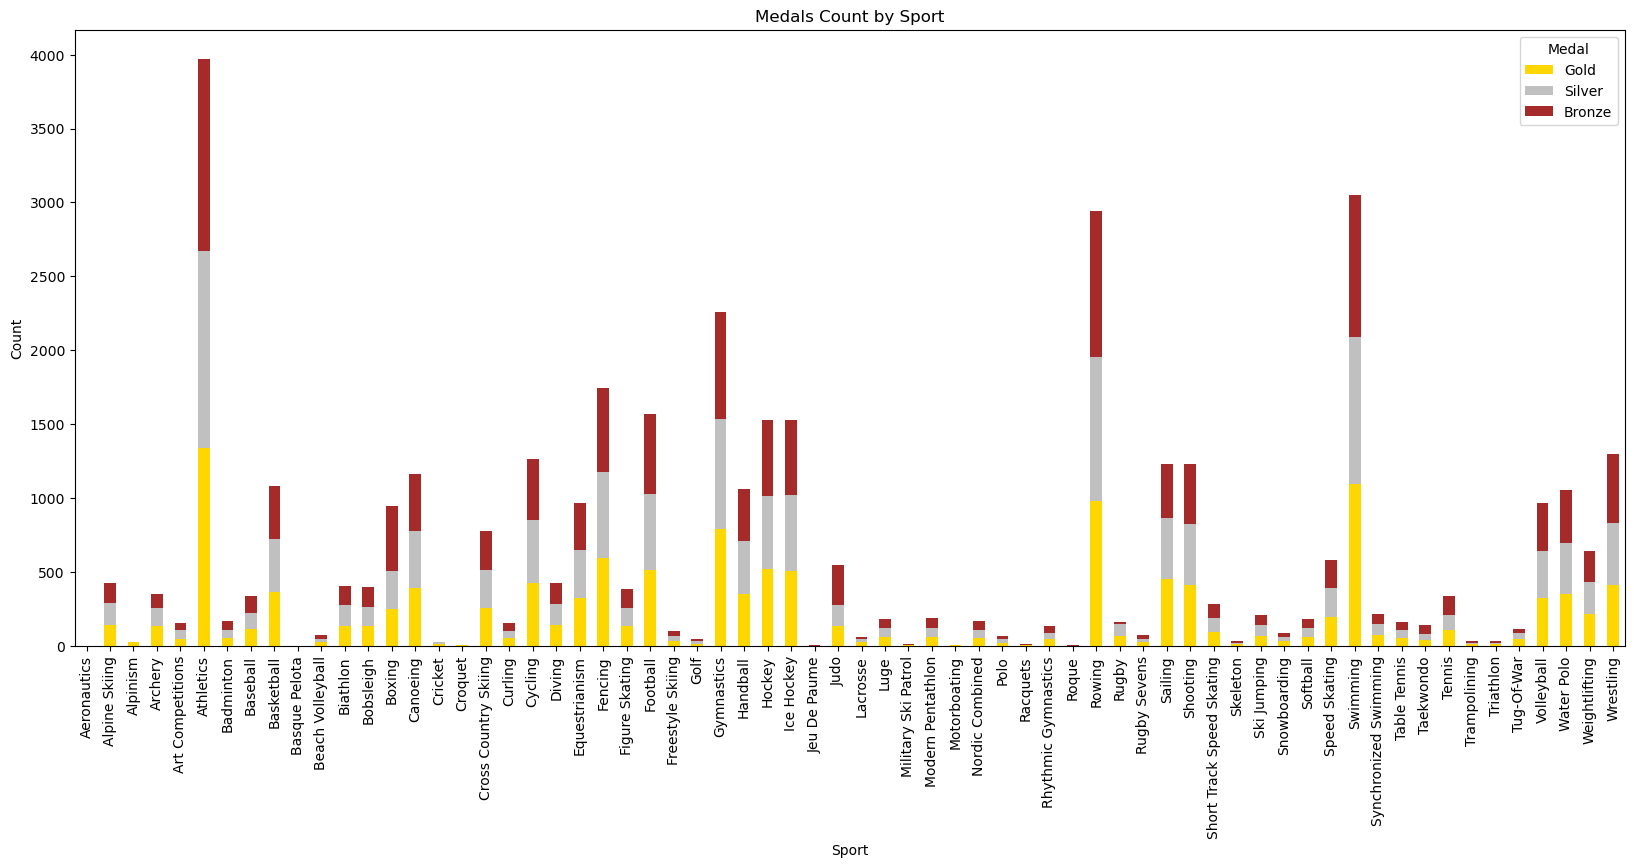

In [125]:
filtered_df = df[(df['Medal'] == 'Gold') | (df['Medal'] == 'Silver') | (df['Medal'] == 'Bronze')]

# Group by Sport and Medal, then count occurrences
grouped_df = filtered_df.groupby(['Sport', 'Medal']).size().unstack(fill_value=0)

# Plotting each medal type separately
plt.figure(figsize=(20, 8))

# Plot Gold Medals
grouped_df['Gold'].plot(kind='bar', stacked=True, color='gold', label='Gold')
# Plot Silver Medals
grouped_df['Silver'].plot(kind='bar', stacked=True, bottom=grouped_df['Gold'], color='silver', label='Silver')
# Plot Bronze Medals
grouped_df['Bronze'].plot(kind='bar', stacked=True, bottom=grouped_df['Gold'] + grouped_df['Silver'], color='brown', label='Bronze')

plt.title('Medals Count by Sport')
plt.xlabel('Sport')
plt.ylabel('Count')
plt.legend(title='Medal')
plt.show()


In [127]:
from tabulate import tabulate

print("Medals Count by Sport:")
print(tabulate(grouped_df, headers='keys', tablefmt='grid'))


Medals Count by Sport:
+---------------------------+----------+--------+----------+
| Sport                     |   Bronze |   Gold |   Silver |
+===========================+==========+========+==========+
| Aeronautics               |        0 |      1 |        0 |
+---------------------------+----------+--------+----------+
| Alpine Skiing             |      141 |    143 |      144 |
+---------------------------+----------+--------+----------+
| Alpinism                  |        0 |     25 |        0 |
+---------------------------+----------+--------+----------+
| Archery                   |       98 |    135 |      120 |
+---------------------------+----------+--------+----------+
| Art Competitions          |       51 |     49 |       56 |
+---------------------------+----------+--------+----------+
| Athletics                 |     1296 |   1339 |     1334 |
+---------------------------+----------+--------+----------+
| Badminton                 |       60 |     54 |       54 |
+